## Import Modules and Import Data

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import *

import warnings
warnings.filterwarnings("ignore")

# Figures inline and set visualization style
%matplotlib inline

# Import data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
print("Train data dimensions: ", df_train.shape)
print("Test data dimensions: ", df_test.shape)

Train data dimensions:  (60000, 785)
Test data dimensions:  (5000, 785)


## Prepare Data

In [3]:
# Store target variable of training data in a safe place
label_train = df_train.label

# Concatenate training and test sets
data = pd.concat([df_train.drop(['label'], axis=1), df_test])

In [4]:
# Return the first few rows of the dataset
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,id
count,65000.0,65000.0,65000.0,65000.0,65000.0,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,...,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.0,65000.000000,65000.0,5000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.008138,0.027200,0.034862,0.073769,0.113446,...,0.023846,0.020831,0.026585,0.011277,0.001277,0.006554,0.0,0.002508,0.0,2499.500000
std,0.0,0.0,0.0,0.0,0.0,1.416435,2.594558,2.619430,3.949229,4.782459,...,2.314896,1.847182,2.273050,1.663053,0.325553,1.184052,0.0,0.639339,0.0,1443.520003
min,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1249.750000
50%,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2499.500000
75%,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3749.250000
max,0.0,0.0,0.0,0.0,0.0,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,83.000000,227.000000,0.0,163.000000,0.0,4999.000000


In [6]:
# Concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65000 entries, 0 to 4999
Columns: 785 entries, pixel0 to id
dtypes: float64(1), int64(784)
memory usage: 389.8 MB


In [7]:
# Return the number of missing values in each column

def missing_zero_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(data.drop(columns=['id']))

Your selected dataframe has 784 columns and 65000 Rows.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Data Type


In [8]:
# Standardize Data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
for i in data:
    if 'id' not in i:
        data[[i]] = mms.fit_transform(data[[i]])
        
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [9]:
# Split data back into test and train datasets
data_train = data.iloc[:60000]
data_test = data.iloc[60000:]

In [10]:
test_id = data_test['id']
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [11]:
# Split the data into train and validations sets by using train_test_split
from sklearn.model_selection import train_test_split

X = data_train.drop(["id"],axis= 1)
y = label_train
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)

## Explore Data

### Plot a number

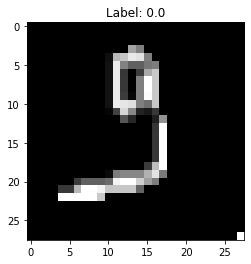

In [12]:
# Plot a number
num = 12
plot_num = data_train.iloc[num, 1:]
plot_num = np.array(plot_num).reshape(28, -1)
plt.imshow(plot_num, cmap='gray')
plt.title(f'Label: {data_train.iloc[num, 0]}')
plt.show()

### Distribution of Label

[Text(0.5, 1.0, 'Distribution of Label')]

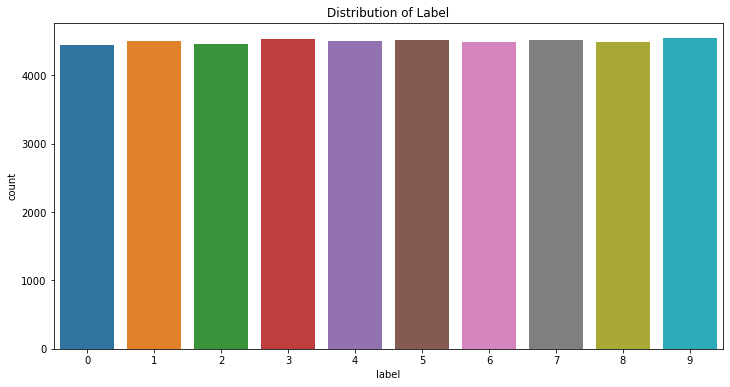

In [13]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y_train).set(title="Distribution of Label")

In [14]:
#Check the frequency of each number
y_train.value_counts().sort_index()

0    4447
1    4502
2    4467
3    4533
4    4504
5    4511
6    4483
7    4522
8    4486
9    4545
Name: label, dtype: int64

## Build Models

### Random Forest

In [15]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import *

In [16]:
start=datetime.now()

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Fit data
rf.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = rf.predict(X_valid)

end=datetime.now()
print(end-start)

0:00:12.671635


In [17]:
# Use score method to get accuracy of model
print('Accuracy: %.4f'
      % rf.score(X_valid, y_valid))

Accuracy: 0.9811


In [18]:
prediction_rf = rf.predict(data_test.drop(columns=['id']))

submission_rf = pd.DataFrame(test_id)
submission_rf['label'] = prediction_rf

submission_rf.to_csv('Submission_RF.csv', index = False)

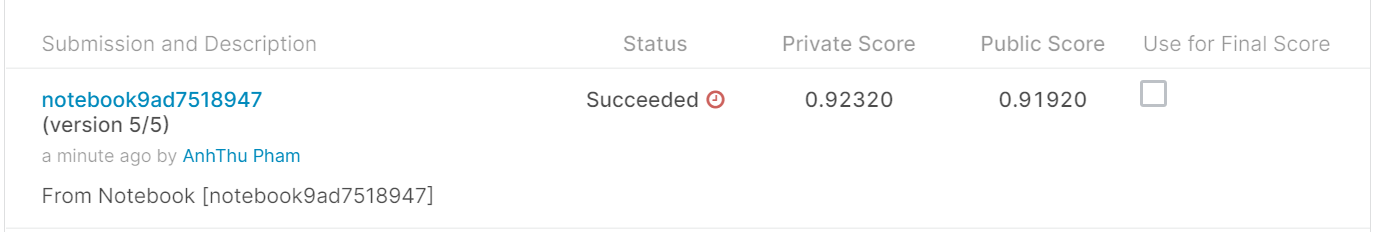

In [19]:
from PIL import Image

# Kaggle Score
path = "rf_score.PNG"
img  = Image.open(path) 
img

### Principal Components Analysis

In [20]:
# Choosing dimensions
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data.drop(["id"],axis= 1))
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

239

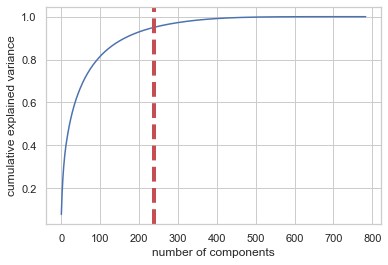

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.078209,0.078209
1,0.133319,0.055110
2,0.177706,0.044387
3,0.213916,0.036210
4,0.247763,0.033847
5,0.275153,0.027390
6,0.299403,0.024250
7,0.320287,0.020884
8,0.340625,0.020338
9,0.357776,0.017150


In [21]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=d, ymin=0, ymax=1)
display(plt.show())

evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [22]:
start=datetime.now()

pca = PCA(n_components=d)
pca.fit(data.drop(["id"],axis= 1))

end=datetime.now()
print(end-start)

0:00:11.427833


In [23]:
pca = PCA(n_components=d)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_valid_pca = pca.transform(X_valid)

### Random Forest PCA

In [24]:
start=datetime.now()

rf_1 = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Fit data
rf_1.fit(X_train_pca,y_train)

# Make predictions using the testing set
y_pred = rf_1.predict(X_valid_pca)

end=datetime.now()
print(end-start)

0:00:43.018579


In [25]:
# Use score method to get accuracy of model
print('Accuracy: %.4f'
      % rf_1.score(X_valid_pca, y_valid))

Accuracy: 0.9645


In [26]:
X_test_pca = pca.transform(data_test.drop(columns=['id']))

prediction_rf_1 = rf_1.predict(X_test_pca)

submission_rf_1 = pd.DataFrame(test_id)
submission_rf_1['label'] = prediction_rf_1

submission_rf_1.to_csv('Submission_RF_1.csv', index = False)

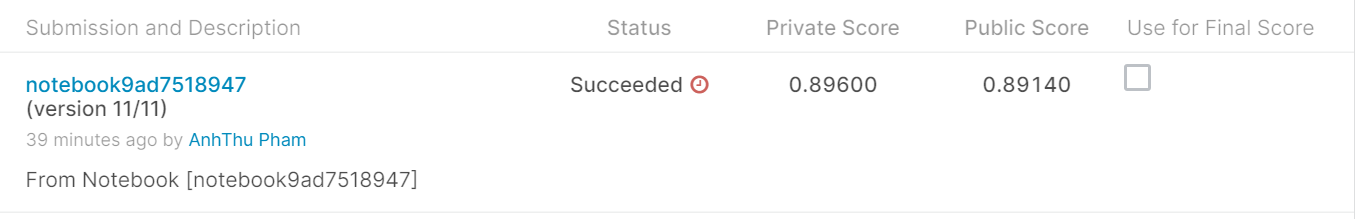

In [27]:
# Kaggle Score
path = "rf1_score.PNG"
img  = Image.open(path) 
img

### PCA and Random Forest - Fixed

The flaw in design was that we used both train and test set for principal component analysis. None of the test data should be seen during the process of training.

In [28]:
# Choosing dimensions
from sklearn.decomposition import PCA

pca_2 = PCA()
pca_2.fit(X_train)
cumsum = np.cumsum(pca_2.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

237

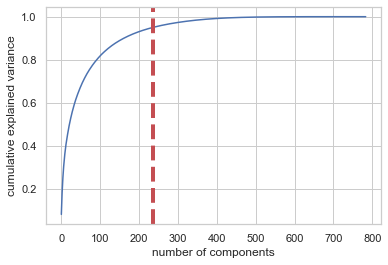

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.079673,0.079673
1,0.135426,0.055753
2,0.179986,0.044560
3,0.216495,0.036509
4,0.250894,0.034400
5,0.278741,0.027846
6,0.303130,0.024389
7,0.324062,0.020933
8,0.344387,0.020325
9,0.361626,0.017239


In [29]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=d, ymin=0, ymax=1)
display(plt.show())

evr = pca_2.explained_variance_ratio_
cvr = np.cumsum(pca_2.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [30]:
start=datetime.now()

pca_2 = PCA(n_components=d)
pca.fit(X_train)

end=datetime.now()
print(end-start)

0:00:07.784155


In [31]:
pca_2 = PCA(n_components=d)
pca_2.fit(X_train)
X_train_pca_2 = pca_2.transform(X_train)
X_valid_pca_2 = pca_2.transform(X_valid)

In [32]:
start=datetime.now()

rf_2 = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Fit data
rf_2.fit(X_train_pca_2,y_train)

# Make predictions using the testing set
y_pred = rf_2.predict(X_valid_pca_2)

end=datetime.now()
print(end-start)

0:00:38.581386


In [33]:
# Use score method to get accuracy of model
print('Accuracy: %.4f'
      % rf_2.score(X_valid_pca_2, y_valid))

Accuracy: 0.9663


In [34]:
X_test_pca_2 = pca_2.transform(data_test.drop(columns=['id']))

prediction_rf_2 = rf_2.predict(X_test_pca_2)

submission_rf_2 = pd.DataFrame(test_id)
submission_rf_2['label'] = prediction_rf_2

submission_rf_2.to_csv('Submission_RF_2.csv', index = False)

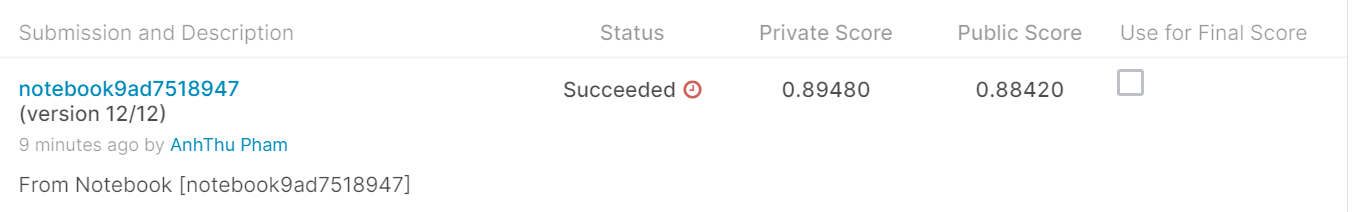

In [35]:
# Kaggle Score
path = "rf2_score.PNG"
img  = Image.open(path) 
img

### K-Means

In [36]:
from sklearn.cluster import MiniBatchKMeans

start=datetime.now()

total_clusters = 35

# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)

# Fitting the model to training set
kmeans.fit(X)

kmeans.labels_

end=datetime.now()
print(end-start)

0:00:05.059473


In [37]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels.iloc[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions

cluster_labels = infer_cluster_labels(kmeans, y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(y[:20])

[0 1 2 4 4 5 7 7 8 9 0 1 2 3 4 5 6 7 8 9]
0     0
1     1
2     2
3     3
4     4
5     5
6     6
7     7
8     8
9     9
10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
19    9
Name: label, dtype: int64


In [38]:
from sklearn.metrics import accuracy_score

# Use score method to get accuracy of model
print('Accuracy: %.4f'
      % accuracy_score(predicted_labels, y))

Accuracy: 0.8718


In [39]:
predicted_labels = infer_data_labels(X_clusters, cluster_labels)

prediction_kmeans = kmeans.predict(data_test.drop(columns=['id']))
prediction_kmeans = infer_data_labels(prediction_kmeans, cluster_labels)

submission_kmeans = pd.DataFrame(test_id)
submission_kmeans['label'] = prediction_kmeans

submission_kmeans.to_csv('Submission_KMeans.csv', index = False)

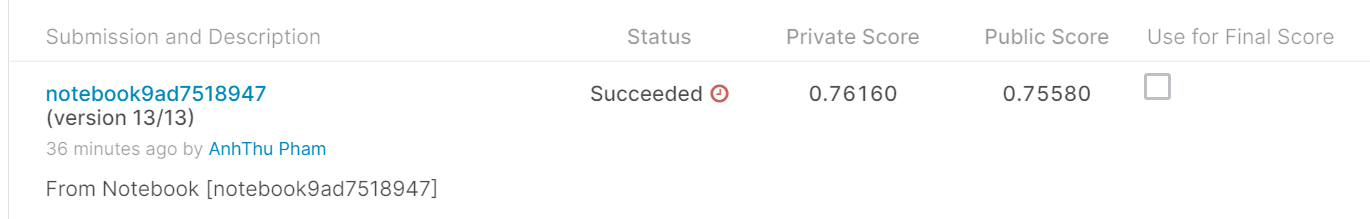

In [40]:
# Kaggle Score
path = "kmeans_Score.PNG"
img  = Image.open(path) 
img

## Exposition

The purpose of the project is to correctly identify digits from a dataset of more than sixty thousands of handwritten images.

In the 1st part, I use the Random Forest Classifier, which is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object. The algorithm that uses all variables returns the accuracy of 92% on the test set.

In the 2nd part, I execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components is 239. The Random Forest with PCA returns the accuracy of 89% on the test set.

In the 3rd part, I execute PCA on only the training set as the 2nd part has a major flaw of using both training and test set. The new number of principal components is 237. The Random Forest with PCA returns the accuracy of 88% on the test set.

In the last part, I use the K-Means, which is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. The K-Means returns the accuracy of 76% on the test set.